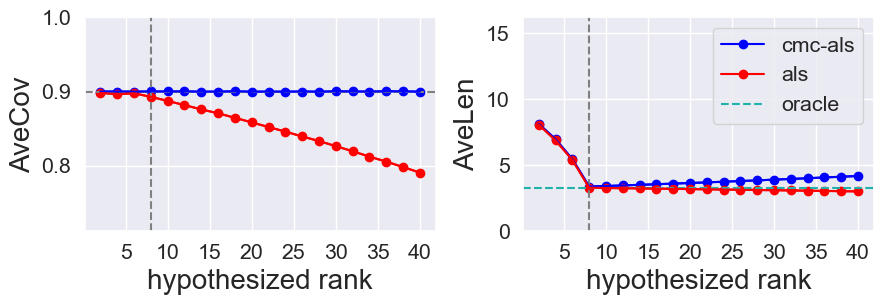

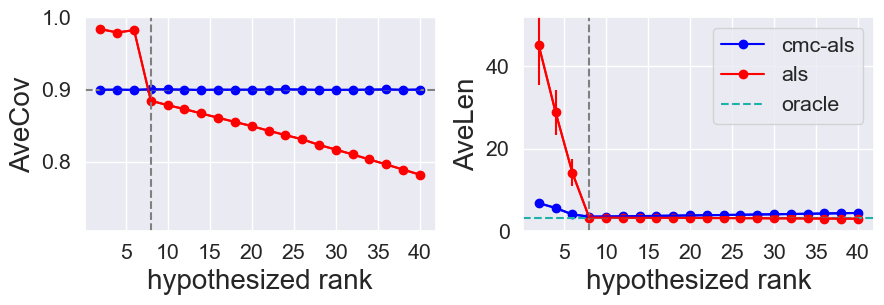

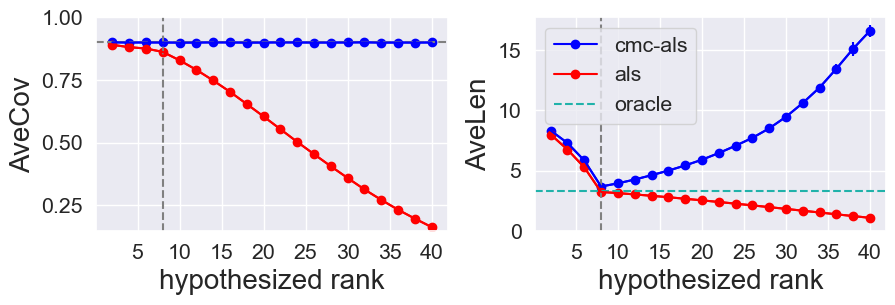

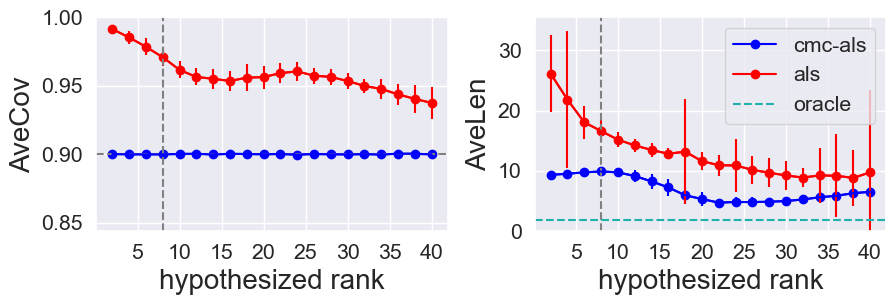

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# plot
alpha = 0.1
sd0 = 1
het = 'homo' # 'homo' | 'logis' | 'rank1'
base1 = 'cvx'
base2 = 'als'
repN = 100
sigma_true=False
full_exp = False
k_star = 8
if full_exp:
    rk_seq = range(4,25,4)
    rk_x = 1
else:
    rk_seq = range(2,41,2)
    rk_x = 3

for d in [500]:
    d1 = d2 = d
    for pr0 in [0.8]:
        for mis_set in [0,1,2,3]:
            if mis_set==2:
                pr = 0.2
            else:
                pr = pr0
            if mis_set==3:
                tail='t'
                sd = 0.2
            else:
                tail='gaussian'
                sd = sd0
            cov_conf = np.zeros(len(rk_seq))
            cov_conf_hat = np.zeros(len(rk_seq))
            cov_als = np.zeros(len(rk_seq))
            cov_cvx = np.zeros(len(rk_seq))
            len_conf = np.zeros(len(rk_seq))
            len_conf_hat = np.zeros(len(rk_seq))
            len_als = np.zeros(len(rk_seq))
            len_cvx = np.zeros(len(rk_seq))

            sd_cov_conf = np.zeros(len(rk_seq))
            sd_cov_conf_hat = np.zeros(len(rk_seq))
            sd_cov_als = np.zeros(len(rk_seq))
            sd_cov_cvx = np.zeros(len(rk_seq))
            sd_len_conf = np.zeros(len(rk_seq))
            sd_len_conf_hat = np.zeros(len(rk_seq))
            sd_len_als = np.zeros(len(rk_seq))
            sd_len_cvx = np.zeros(len(rk_seq))
            for i_rk in range(len(rk_seq)):
                rk = rk_seq[i_rk]
                file_dir1 = '../results/cov_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+str(rk)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(pr)+'_'+str(sigma_true)+'_'+str(full_exp)+'.csv'
                file_dir2 = '../results/len_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+str(rk)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(pr)+'_'+str(sigma_true)+'_'+str(full_exp)+'.csv'
#                 file_dir1 = '../results/cov_'+str(d1)+'_'+str(low_d)+'_'+het+'_'+str(sd)+'_'+str(sd_perturb)+'_'+tail+'_'+str(pr)+'.csv'
#                 file_dir2 = '../results/len_'+str(d1)+'_'+str(low_d)+'_'+het+'_'+str(sd)+'_'+str(sd_perturb)+'_'+tail+'_'+str(pr)+'.csv'
                cov_df = pd.read_csv(file_dir1)
                len_df = pd.read_csv(file_dir2)


                label1 = 'cmc-'+base1
                label2 = 'cmc-'+base2
                label3 = base1
                label4 = base2
                
                if full_exp:
                    nam_ = [label1]*repN + [label2]*repN + [label3]*repN + [label4]*repN
                else:
                    nam_ = [label2]*repN + [label4]*repN
                cov_df['approach'] = nam_
                len_df['approach'] = nam_

                cov_conf_hat[i_rk] = cov_df[cov_df['approach']==label2].mean(axis=0)[0]
                cov_als[i_rk] = cov_df[cov_df['approach']==label4].mean(axis=0)[0]
                sd_cov_conf_hat[i_rk] = cov_df[cov_df['approach']==label2].sem(axis=0)[0]*np.sqrt(repN)
                sd_cov_als[i_rk] = cov_df[cov_df['approach']==label4].sem(axis=0)[0]*np.sqrt(repN)

                len_conf_hat[i_rk] = len_df[len_df['approach']==label2].mean(axis=0)[0]
                len_als[i_rk] = len_df[len_df['approach']==label4].mean(axis=0)[0]
                sd_len_conf_hat[i_rk] = len_df[len_df['approach']==label2].sem(axis=0)[0]*np.sqrt(repN)
                sd_len_als[i_rk] = len_df[len_df['approach']==label4].sem(axis=0)[0]*np.sqrt(repN)
                ymax = max(len_conf_hat+len_als)
    
                if full_exp:
                    cov_conf[i_rk] = cov_df[cov_df['approach']==label1].mean(axis=0)[0]
                    cov_cvx[i_rk] = cov_df[cov_df['approach']==label3].mean(axis=0)[0]
                    sd_cov_conf[i_rk] = cov_df[cov_df['approach']==label1].sem(axis=0)[0]*np.sqrt(repN)
                    sd_cov_cvx[i_rk] = cov_df[cov_df['approach']==label3].sem(axis=0)[0]*np.sqrt(repN)
                    len_conf[i_rk] = len_df[len_df['approach']==label1].mean(axis=0)[0]
                    len_cvx[i_rk] = len_df[len_df['approach']==label3].mean(axis=0)[0]
                    sd_len_conf[i_rk] = len_df[len_df['approach']==label1].sem(axis=0)[0]*np.sqrt(repN)
                    sd_len_cvx[i_rk] = len_df[len_df['approach']==label3].sem(axis=0)[0]*np.sqrt(repN)
                    ymax = max(len_cvx)*2.5


            fig, ax = plt.subplots(ncols=2,figsize=(9,3))     
            fig.tight_layout(pad=1)
            sns.set(font_scale = 1.4)

            col_seq=['orange','blue','green','red']
            cov_min = min(min(cov_als)*0.9,1-alpha)

            ax[0].plot(range(len(rk_seq)), cov_conf_hat, marker='o', label=label2, c=col_seq[1])
            ax[0].errorbar(range(len(rk_seq)), cov_conf_hat, yerr = sd_cov_conf_hat, c=col_seq[1])
            ax[0].plot(range(len(rk_seq)), cov_als, marker='o', label=label4, c=col_seq[3])
            ax[0].errorbar(range(len(rk_seq)), cov_als, yerr = sd_cov_als, c=col_seq[3])
            if full_exp:
                ax[0].plot(range(len(rk_seq)), cov_conf, marker='o', label=label1, c=col_seq[0])
                ax[0].errorbar(range(len(rk_seq)), cov_conf, yerr = sd_cov_conf, c=col_seq[0])
                ax[0].plot(range(len(rk_seq)), cov_cvx, marker='o', label=label3, c=col_seq[2])
                ax[0].errorbar(range(len(rk_seq)), cov_cvx, yerr = sd_cov_cvx, c=col_seq[2])
                ax[0].set_xticks([0.25,1.5,2.75,4],[5,10,15,20])
            else:
                ax[0].set_xticks([1.5,4,6.5,9,11.5,14,16.5,19],[5,10,15,20,25,30,35,40])
            ax[0].set_ylim((cov_min,1))
            ax[0].set_xlabel('hypothesized rank',fontsize=20)
            ax[0].set_ylabel('AveCov',fontsize=20)
            ax[0].axvline(x = rk_x, color = 'grey', linestyle = '--')
            ax[0].axhline(y = 1-alpha, color = 'grey', linestyle = '--')

            ax[1].plot(range(len(rk_seq)), len_conf_hat, marker='o', label=label2, c=col_seq[1])
            ax[1].errorbar(range(len(rk_seq)), len_conf_hat, yerr = sd_len_conf_hat, c=col_seq[1])
            ax[1].plot(range(len(rk_seq)), len_als, marker='o', label=label4, c=col_seq[3])
            ax[1].errorbar(range(len(rk_seq)), len_als, yerr = sd_len_als, c=col_seq[3])
            if full_exp:         
                ax[1].plot(range(len(rk_seq)), len_conf, marker='o', label=label1, c=col_seq[0])
                ax[1].errorbar(range(len(rk_seq)), len_conf, yerr = sd_len_conf, c=col_seq[0])
                ax[1].plot(range(len(rk_seq)), len_cvx, marker='o', label=label3, c=col_seq[2])
                ax[1].errorbar(range(len(rk_seq)), len_cvx, yerr = sd_len_cvx, c=col_seq[2])
                ax[1].set_xticks([0.25,1.5,2.75,4],[5,10,15,20])
            else:
                ax[1].set_xticks([1.5,4,6.5,9,11.5,14,16.5,19],[5,10,15,20,25,30,35,40])
            ax[1].set_xlabel('hypothesized rank',fontsize=20)
            ax[1].set_ylabel('AveLen',fontsize=20)
            ax[1].set_ylim((0,ymax))
            ax[1].axvline(x = rk_x, color = 'grey', linestyle = '--')
            
            if tail=='gaussian':
                oracle_len = scipy.stats.norm.ppf(1-alpha/2,0,sd)
            elif tail=='t':
                oracle_len = sd * scipy.stats.t.ppf(1-alpha/2,1.2)
            ax[1].axhline(y = 2*oracle_len, color = 'lightseagreen', linestyle = '--', label='oracle')
            ax[1].legend(loc='best',ncol=1)

            plot_dir = '../plot_paper/plot_rk_'+str(alpha)+'_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(pr)+'_'+str(sigma_true)+'_'+str(full_exp)+'.pdf'
            plt.savefig(plot_dir, bbox_inches='tight')